In [22]:
'''
This file generates visualizations and data analysis on the PDGA
Player Statistics dataset, which was obtained via html scraping
with the pdga_playerstats_Scrape_... notebook
'''



import pandas as pd
import numpy as np
import time
from datetime import datetime
import os

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px


style.use("ggplot")

%matplotlib inline



In [23]:
#Importing the dataframe from the scraped .csv file
df = pd.read_csv("./pdga_player_stats_05_11_21_01-48-08.csv")
df.drop(df.loc[df['Rating']==0].index, inplace=True) #dropping players with no rating
df.drop_duplicates(subset='PDGA #', inplace=True) #dropping double counted players


In [24]:
df.describe()

,Unnamed: 0,PDGA #,Rating,Year,Events,Points
count,76443.000000,76443.000000,76443.000000,76443.0,76443.000000,76443.000000
mean,54979.943383,124365.512630,860.232343,2021.0,4.067554,392.782962
std,37687.131976,47410.772907,80.394511,0.0,4.363160,979.536181
min,0.000000,44.000000,8.000000,2021.0,1.000000,0.000000
25%,21902.500000,92247.500000,825.000000,2021.0,1.000000,40.000000
50%,49541.000000,134442.000000,874.000000,2021.0,3.000000,130.000000
75%,85348.500000,162898.500000,912.000000,2021.0,5.000000,378.000000
max,132539.000000,193125.000000,1054.000000,2021.0,97.000000,28427.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.



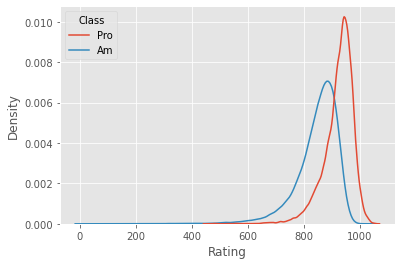

In [25]:
sns_kdeplot = sns.kdeplot(df["Rating"], hue=df["Class"], common_norm=False, bw=.1)
sns_kdeplot.figure.savefig("agg_kdeplot.png", facecolor='w')

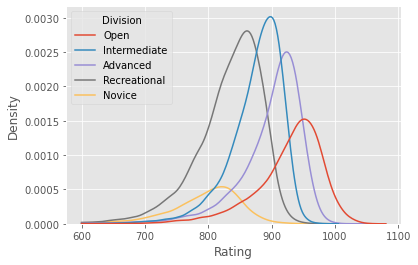

In [26]:
main_divs = df.loc[df["Division"].isin(["Open", "Advanced", "Intermediate", "Recreational", "Novice"])]

sns_div_kdeplot = sns.kdeplot(main_divs["Rating"], hue=main_divs["Division"], clip=(600, 1200))
sns_div_kdeplot.figure.savefig("div_kdeplot.png", facecolor='w')

In [27]:
usdf = df.loc[df["Country"]=="United States"]
grouped_df = usdf.groupby(["State/Province", "Class"]).mean()
grouped_df.drop(columns=["Unnamed: 0", "PDGA #", "Year", "Points"], inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(grouped_df)


grouped_df.to_csv("ratings_events_by_state.csv")

Rating    Events
State/Province                           Class                      
Alabama                                  Am     840.372792  3.664311
                                         Pro    929.543046  6.536424
Alaska                                   Am     834.090361  4.542169
                                         Pro    916.301887  6.283019
Arizona                                  Am     831.178838  3.067064
                                         Pro    933.438596  4.701754
Arkansas                                 Am     849.388254  3.402936
                                         Pro    926.971631  6.099291
Armed Forces (Americas)                  Am     802.000000  1.000000
Armed Forces (Europe, Canada, Middle Eas Am     829.545455  3.000000
                                         Pro    922.666667  3.333333
Armed Forces (Pacific)                   Am     771.565217  2.347826
                                         Pro    983.000000  1.000000
California                               Am     857.265662  3.174874
                                         Pro    932.263873  5.339751
Colorado                                 Am     844.852960  4.180140
                                         Pro    919.980296  6.347291
Connecticut                              Am     859.755396  3.615108
                                         Pro    935.400000  5.912500
Delaware                                 Am     851.485876  3.762712
                                         Pro    912.514286  5.428571
District of Columbia                     Am     878.454545  4.590909
                                         Pro    936.000000  6.200000
Florida                                  Am     849.973877  3.609991
                                         Pro    931.275986  5.455197
Georgia                                  Am     835.801561  3.628763
                                         Pro    928.587963  6.064815
Hawaii                                   Am     838.726027  1.438356
                                         Pro    902.625000  1.583333
Idaho                                    Am     851.079295  3.649780
                                         Pro    934.622642  6.037736
Illinois                                 Am     842.739220  3.693532
                                         Pro    931.116788  6.521898
Indiana                                  Am     840.317536  4.096818
                                         Pro    928.508876  6.810651
Iowa                                     Am     854.398247  4.567673
                                         Pro    931.420118  7.260355
Kansas                                   Am     850.203373  3.628968
                                         Pro    933.382199  6.068063
Kentucky                                 Am     838.683975  3.905103
                                         Pro    925.829268  8.024390
Louisiana                                Am     841.670940  3.858974
                                         Pro    918.343750  5.489583
Maine                                    Am     859.211699  3.913649
                                         Pro    925.365217  6.573913
Maryland                                 Am     840.677530  3.284734
                                         Pro    925.255319  6.553191
Massachusetts                            Am     847.454282  3.542816
                                         Pro    931.561111  7.705556
Michigan                                 Am     850.304317  3.584731
                                         Pro    922.337469  6.637717
Minnesota                                Am     848.932336  3.925214
                                         Pro    927.347305  6.410180
Mississippi                              Am     846.968370  3.024331
                                         Pro    932.584416  4.831169
Missouri                                 Am     850.344415  3.730718
                                         Pro    93

In [28]:
#Plotly express professional ratings chloropleth, pro median rating by state
state_codes = {
    'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}




pro_df = df[df["Class"]=="Pro"]
pro_df = pro_df[pro_df["Country"] == "United States"] #Isolate to players from US
pro_df = pro_df[pro_df["State/Province"].str.contains("Armed Forces")==False] #Drop Armed Forces players for choropleth
pro_grouped = pro_df.groupby(["State/Province"]).median()
pro_grouped.drop(columns=["Unnamed: 0", "PDGA #", "Year", "Points", "Events"], inplace=True)
pro_grouped["State Codes"] = pro_grouped.index.map(lambda x : state_codes[x])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(pro_grouped)

fig = px.choropleth(pro_grouped, locations = 'State Codes', locationmode = 'USA-states',
                    color='Rating', color_continuous_scale='viridis', scope='usa',
                   title='Median Ratings of Pro Disc Golfers by State, October 2021')

fig.write_image("us_pro_medianrating_choropleth.png")
fig.show()


,Rating,State Codes
State/Province,,
Alabama,940.0,AL
Alaska,928.0,AK
Arizona,940.0,AZ
Arkansas,936.0,AR
California,943.0,CA
Colorado,930.0,CO
Connecticut,944.5,CT
Delaware,926.0,DE
District of Columbia,921.0,dc


In [29]:
print(pro_grouped.index[1])

Alaska


In [30]:


grouped_maindivs = main_divs.groupby(["Division"]).agg({"Rating" : [np.median, np.mean, 'count']})
#grouped_maindivs.drop(columns=["Unnamed: 0", "PDGA #", "Year", "Events", "Points"], inplace=True)
display(grouped_maindivs)

Rating                   
             median        mean  count
Division                              
Advanced        911  897.818189  12821
Intermediate    884  875.084419  14961
Novice          805  793.432572   3678
Open            939  926.972421   9246
Recreational    843  832.960541  17892

In [31]:
df.head()

,Unnamed: 0,Name,PDGA #,Rating,Year,Gender,Class,Division,Country,State/Province,Events,Points,Cash
0,0,J. Freeman,69509,1031,2021,Male,Pro,Open,United States,Colorado,32,28427.0,"$32,535.00"
1,1,G. Gurthie,13864,1031,2021,Male,Pro,Open,United States,Florida,30,28370.0,"$26,555.00"
2,2,P. McBeth,27523,1050,2021,Male,Pro,Open,United States,California,24,28310.0,"$88,903.00"
3,3,N. Queen,68286,1026,2021,Male,Pro,Open,United States,North Carolina,34,28190.0,"$49,655.00"
4,4,R. Wysocki,38008,1054,2021,Male,Pro,Open,United States,South Carolina,24,27930.0,"$79,429.00"


In [32]:
display(df.groupby("Division").count())

,Unnamed: 0,Name,PDGA #,Rating,Year,Gender,Class,Country,State/Province,Events,Points,Cash
Division,,,,,,,,,,,,
Advanced,12821,12821,12821,12821,12821,12821,12821,12821,11688,12821,12821,0
Advanced Women,1003,1003,1003,1003,1003,1003,1003,1003,881,1003,1003,0
Amateur Masters 40+,4172,4172,4172,4172,4172,4172,4172,4172,3746,4172,4172,0
Amateur Masters 50+,2074,2074,2074,2074,2074,2074,2074,2074,1940,2074,2074,0
Amateur Masters 55+,144,144,144,144,144,144,144,144,143,144,144,0
Amateur Masters 60+,607,607,607,607,607,607,607,607,605,607,607,0
Amateur Masters 65+,34,34,34,34,34,34,34,34,34,34,34,0
Amateur Masters 70+,49,49,49,49,49,49,49,49,48,49,49,0
Amateur Masters Women 40+,246,246,246,246,246,246,246,246,215,246,246,0


In [33]:
print(df["PDGA #"].nunique())

76443
